Breweries Recommendation

This means that we will make a recommendation system that will refer closest breweries to a person or group of people based on his or her location coordinates that is latitude an longitude coordinates.

Table of Contents

1. importing prerequisite libraries and loading the json dataset

2. Data analysis

3. Data visualisation

3. K_means clustering and elbow plot

4. Breweries recommendation based on location

In [54]:
# importing prerequisite libraries for our analyis
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt
import geopy

Note:The dataset below is in json format thus it will be loaded in a diffrent way compared to a csv file.

In [55]:
# 
biz_file = open('../tochora/dd/yelp_academic_dataset_business.json', encoding='latin-1')
#
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()
#reading components of our dataset
biz_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [56]:
# shape of our dataset
biz_df.shape

(150346, 14)

It has 150,346 rows and 14 columns thus it is quite a large dataset.

Statistics

In [57]:
#statistics pf only relevant columns
biz_df[['stars', 'review_count']].describe()

,stars,review_count
count,150346.000000,150346.000000
mean,3.596724,44.866561
std,0.974421,121.120136
min,1.000000,5.000000
25%,3.000000,8.000000
50%,3.500000,15.000000
75%,4.500000,37.000000
max,5.000000,7568.000000


Data Analysis

This analysis will involve checking the performance of companies, relationship between performance and relative size of the companies involved and how review stars were distributed among various companies.

NB: Mostly analysis succeed data visualisation so as to have a better understanding of data but ours won't make a difference since we wo't alter the contents of the original dataset.

In [58]:
# grouping name by stars received by a company
company_rating = biz_df.groupby(['name']).stars.mean()
# grouping name of the company with he number of review counts
company_review_count = biz_df.groupby(['name']).review_count.sum()
# grouping name of the company by the cities
company_city = biz_df.groupby(['name']).city.nunique()
# combining those dataframes to form a full dataframe
result = pd.concat([company_review_count, company_rating, company_city], axis=1, join='inner')
result.sort_values(by='city', ascending=False).head(-10)


,review_count,stars,city
name,,,
McDonald's,17359,1.863442,263
Dunkin',9864,2.302941,235
Starbucks,20692,3.126381,197
Wawa,4263,3.319218,167
Domino's Pizza,6291,2.281356,165
...,...,...,...
Gavas Alterations,10,4.500000,1
Gautreau's Restaurant,188,4.000000,1
Gauthreauxs Chop Shop,11,5.000000,1


Dominant firms like Macdonald has the largest review counts of 17359 entries, mean stars of 1.863442 and is located in 263 cities, followed by Dunkin with 9864 review counts, mean stars of 2.302941 and located in 235 cities while the less dominant firm is Gaul & Co. Malhouse and it has 127 review counts, mean stars of 4.5 and located in 1 city.

Conclusion:Mcdonald, Dunkin upto Domino's Plaza have the high number of review counts, located in many cities but they have the low stars means compared to small companies like Gavas alteratios that have 10 review counts, mean star of 5 and loacted in 1 city. Our hypothesis is that Larger companies are performing bad compared to small companies. 

Let us check individual companies performance to justify or disapprove our hypothesis. We will start with large companies.

In [59]:
# 
mcdonalds = biz_df.loc[biz_df['name'] == "McDonald's"]
mcdonalds[['name', 'business_id', 'review_count', 'stars','city']].sort_values(['review_count', 'stars'], ascending=[False, False])


,name,business_id,review_count,stars,city
145369,McDonald's,3UHXD8T80OUFMCzLb3x-sQ,176,1.0,New Orleans
147573,McDonald's,RL6BaK196Scg2DEY3Uc1AQ,160,1.5,Indianapolis
146417,McDonald's,a5TaDLChZDSgZ-en1sxNpw,121,1.5,Reno
45077,McDonald's,lA5BOb5Om5cn_dfwiOgbNg,111,1.5,Reno
86328,McDonald's,_mGAcxIOqKcL3muEg3LHLA,106,1.5,Reno
...,...,...,...,...,...
80461,McDonald's,eQG5bKz5S4F0jG8mMw7ohQ,5,1.0,Tampa
97359,McDonald's,nJxCI5M1-stOtXyFrYhuxw,5,1.0,Philadelphia
97509,McDonald's,UYIr1d1zJr3jVYhXOoxyLg,5,1.0,Jennings
130950,McDonald's,UJQGJ0tlKO93Lia2JGidZA,5,1.0,Philadelphia


Mcdonalds has lowly rated stars with an average of 1.3 stars meaning that its services are viewed by consumers as subpar compared to their expectations. Let us check a smaller firm

In [60]:
Gava_alterations = biz_df.loc[biz_df['name'] == "Gavas Alterations"]
Gava_alterations[['name','business_id', 'review_count','stars','city']].sort_values(by=['review_count','stars'],ascending=[False, False])

,name,business_id,review_count,stars,city
19574,Gavas Alterations,OXZyNord5kMOa495-phxXw,10,4.5,Santa Barbara


A smaller firm Gava Alterations has 10 reviews, and is rated 4.5 stars.This means that firms that are small are able to serve their consumers well thus surpassing their expections.

Note: Small firms might have higher ratings due to few reviews which may skew the distribution of the stars in their favor.Let us check another large firm to check any simillarity with our hypothesis.

In [61]:
Dominos_Pizza = biz_df[biz_df['name'] == "Domino's Pizza"]
Dominos_Pizza[['name','business_id','review_count', 'stars', 'city']].sort_values(by=['review_count','stars'], ascending = [False,False])

,name,business_id,review_count,stars,city
140052,Domino's Pizza,_DvAGDt7KnXPvlY9kxWbiQ,131,1.5,New Orleans
69102,Domino's Pizza,C809UuprygJyEgJw4wr2Pg,106,1.5,Philadelphia
35701,Domino's Pizza,P9hB7eIDMuk2_yRd91hr9A,100,2.0,Reno
61725,Domino's Pizza,vg3JmN8hAiOV1suoxTi1yA,81,2.0,Philadelphia
73428,Domino's Pizza,d-5kMts7CzenaPgDzesQDg,79,2.5,Goleta
...,...,...,...,...,...
2985,Domino's Pizza,Yl4Am6NhqWo_YMmo1SyU5A,5,2.0,Philadelphia
60618,Domino's Pizza,mKGJ9d33coH3kJN16BeQXQ,5,2.0,Carmel
94220,Domino's Pizza,E3f7uDqc_lrTSLkxIyZWhQ,5,2.0,Boyertown
121923,Domino's Pizza,nWe5p-PNN2rD4-b9ap5uiQ,5,2.0,Indianapolis


a similar larger firm Domino's pizza is also low rated and has an average of 2.2 stars. This shows that dominant firms are providing services that most of their consumers consider them lesser than their expectations thus proofing our hypothesis.

Some cities may have the same name but are from different states thus we will combine both a city and its state to show a them as one.

In [62]:
# combining city with its repective state
biz_df['city_state'] = biz_df['city'] + ' ' + biz_df['state']
biz_df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,city_state
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,Santa Barbara CA
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",Affton MO
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Tucson AZ
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Philadelphia PA
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",Green Lane PA


1. Top 10 cities with highest number of reviews

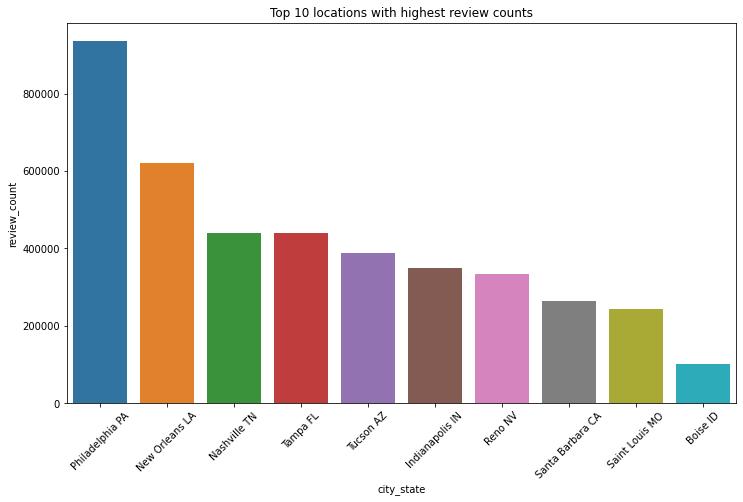

In [63]:
import seaborn as sns
plt.figure(figsize=(12, 7))
# grouping cities in relation to number of reviews
top_state = biz_df.groupby("city_state")['review_count'].sum().reset_index().sort_values(by='review_count', ascending = False)
# visualising our data
state = sns.barplot(x='city_state', y= 'review_count', data=top_state[:10])
state.set_xticklabels(state.get_xticklabels(), rotation=45)
plt.title("Top 10 locations with highest review counts")
plt.show()

from the plot above, Philadelphia PA has the largest bar with more than 800000 reviews, follwed by New Orleans LA with 600000 reviews while Boise ID has the lowest bar with less than 200000 reviews.

conslusion:A quick google search shows Philadelphia has a larger population compared to New Orleans, also New Orleans with Tampa FL upto Boise ID. This shows the higher the population a city has, the higher the aggregate number of reviews a city has.

Top 10 Businesses with highest number of stars

C:\Users\test\AppData\Local\Temp\ipykernel_6684\754663043.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128 (\x80) missing from current font.

c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 139 (\x8b) missing from current font.



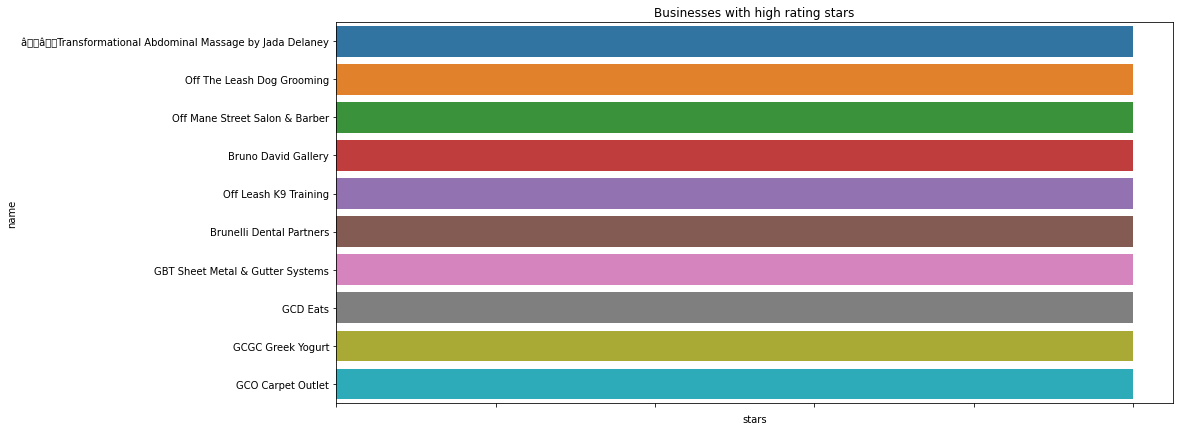

In [64]:
top_name = biz_df.groupby("name")['stars'].mean().reset_index().sort_values(by='stars', ascending=False)
plt.figure(figsize=(15, 7))
name_df = sns.barplot(y="name", x='stars', data=top_name[:10])
name_df.set_xticklabels(name_df.get_xticklabels(), rotation = 45)
plt.title("Businesses with high rating stars")
plt.show()

From above plot the bars have the same size thus there is no diffrence in ratings of the 10 top businesses.

conslusion: These buinesses have ratings stars that are closely related such that there is no significant difference in mean rating of any any of these businesses.

Top 10 Businesses with high reviews in our dataset

Text(0.5, 1.0, 'Top 10 businesses which had high reviews')

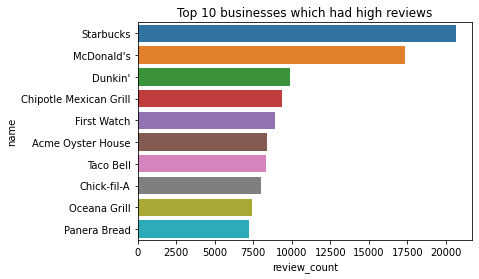

In [65]:
top_businesses = biz_df.groupby("name")['review_count'].sum().reset_index().sort_values(by='review_count', ascending=False)
sns.barplot(x='review_count', y='name', data=top_businesses[:10])
plt.title("Top 10 businesses which had high reviews")

from above plot Starbucks has the largest bar with 20000 review counts, follwed by McDonald's with 17500 review counts while Panera Bread has the smallest bar with less than 7500 review counts.

conslusion: Dominant firms like Starbucks, mcDonald's have high review counts since they have a huge consumer base while small firms like Panera Bread have fewer review counts as they have fewer markets.

Brewery Recommendation

We are going to make breweries recommendation based on the locations where one is. In order to this, we will use longitudes and latitudes to make recommendations.

In [66]:
# creating a dataset with only breweries as it core categorical data
biz_df['Breweries'] = biz_df['categories'].str.contains('Breweries')
biz_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,city_state,Breweries
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,Santa Barbara CA,False
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",Affton MO,False
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Tucson AZ,False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Philadelphia PA,False
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",Green Lane PA,True


In [67]:
df_breweries = biz_df.loc[biz_df.Breweries == True]


In [68]:
biz_df.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
city_state       object
Breweries        object
dtype: object

In [69]:
# shape of our data
df_breweries.shape

(863, 16)

Our breweries dataset has 863 rows and 16 columns

In [70]:
# soring breweries according to the ones with highest number of reviews
top_breweries = df_breweries.sort_values(by=['review_count', 'stars'], ascending=False)[:20]
top_breweries.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,city_state,Breweries
117197,L5LLN0RafiV1Z9cddzvuCw,Ulele,1810 N Highland Ave,Tampa,FL,33602,27.960161,-82.462530,4.0,3064,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Breweries, Food, American (New), Beer, Wine & ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",Tampa FL,True
3913,TDKBPcViJQDMrdUm6a9XZA,The Depot Craft Brewery Distillery,325 E 4th St,Reno,NV,89512,39.531107,-119.809618,4.0,1245,1,"{'Smoking': 'u'no'', 'Alcohol': 'u'full_bar'',...","Food, Restaurants, Brasseries, Breweries, Dist...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-21:0', ...",Reno NV,True
142860,4gszBjoouIzfi1ltSQZ2BQ,Tampa Bay Brewing Company,1600 E 8th Ave,Tampa,FL,33605,27.961543,-82.441147,4.0,1086,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Restaurants, Food, Breweries, American (Tradit...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Tampa FL,True
36430,j8feOxyJqlIJWOi8su2qzw,Serial Grillers,5975 E Speedway Blvd,Tucson,AZ,85712,32.236675,-110.865028,4.5,986,1,"{'NoiseLevel': 'u'average'', 'WiFi': 'u'no'', ...","Cheesesteaks, Food, Salad, Restaurants, Sandwi...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",Tucson AZ,True
49799,ECOUuwE5H1HHE8xBfNAjFg,Crescent City Brewhouse,527 Decatur St,New Orleans,LA,70130,29.955685,-90.063888,3.5,929,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","American (Traditional), Restaurants, Food, Nig...","{'Monday': '12:0-20:0', 'Thursday': '12:0-20:0...",New Orleans LA,True


Text(0.5, 1.0, 'Distribution of beweries in relation to stars')

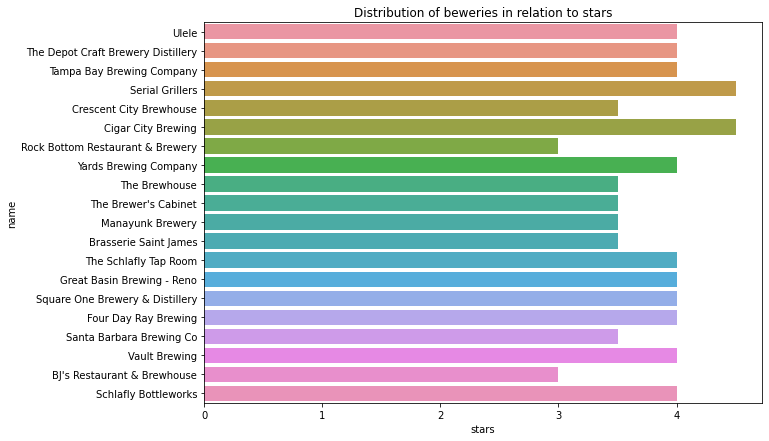

In [71]:
plt.figure(figsize=(10, 7))
# plotting a barplot of stars in relation to breweries names
sns.barplot(x=top_breweries['stars'],y=top_breweries['name'])
plt.title("Distribution of beweries in relation to stars")

From the figure above, Only two breweries had stars averaging more than 4 stars namely Serial Grillers and Cigar City brewing while The low rated breweries had an average of 3 stars of which are only two, Bj's Retaurant & Brewhouse and Rock Bottom Restaurant & brewery. Most of the breweries had an average of approximately 3 to 4 stars.

In [72]:
import plotly
import plotly.offline as py 
import plotly.graph_objs as go 
import plotly.express as px

In [73]:

px.scatter_mapbox(df_breweries, lat='latitude',lon='longitude', color='stars', size='review_count', size_max=30, zoom=3, width=1200, height=800)

In [74]:
vancouver = df_breweries[df_breweries.state == 'PA']
px.scatter_mapbox(vancouver, lat='latitude', lon='longitude', color='stars', size='review_count', size_max=15, zoom=10, width=1200, height=800)


KMeans clustering

This is unsupervised clustering algorithm that groups  unlabelled data depending on how they are laid up in a space. It Uses eucledian distance which measures the difference between 2 points that is if there is point x and y, eucledian distance is ||x - y||.


k-means establishes a hard clustering, meaning that each data point is assigned to one
and only one cluster. The algorithm learns to position the cluster centers such that
the total sum of the Euclidean distance between each data point and its cluster center
is minimized.

well, This algorithm will group locations of breweries based on the distance between them into clusters such that if we give it a certain location based on latitude and longitude coordinates, it will show us breweries located nearby.

In [75]:
from sklearn.cluster import KMeans
# specifiying our region latitude and longitudes
coords = vancouver[['longitude','latitude']]
# an empty list
distortions = []
# range of centroids that will be itrated to find appropriate cluster
K = range(1, 25)
for k in K:
    # iterating inorder to get the right number of clusters
    kmeans_m = KMeans(n_clusters = k)
    # training our model
    kmeans_m = kmeans_m.fit(coords)
    # measuring how  well a dataset was clustered and addin into our empty list
    distortions.append(kmeans_m.inertia_)


Elbow Plot

Below is a figure that will show the appropriate number of clusters to use in our model

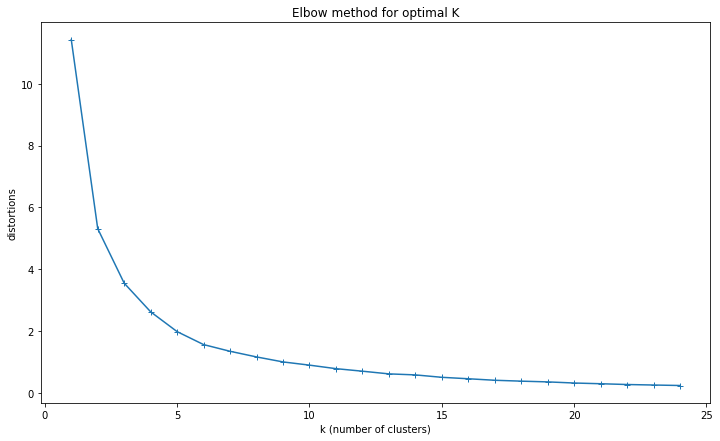

In [76]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(K, distortions, marker = '+')
plt.xlabel("k (number of clusters)")
plt.ylabel("distortions")
plt.title("Elbow method for optimal K")
plt.show()

The above figure forms an elbow at 5 clusters where distortions/inertia starts to decrease in a linear manner thus 5 is the optimal number of clusters we will use in our model.

In [77]:
# using 5 clusters and 
kmeans = KMeans(n_clusters=5, init='k-means++')
# trainign iour model based on Vancouver location
kmeans.fit(coords)
# receiving labels as indices of the clusters
labels = kmeans.labels_

In [88]:
# making prediction based on Vancouver location and clustering them
vancouver['cluster'] = kmeans.predict(vancouver.loc[:, ['longitude','latitude']])
# diplaying the clusters
vancouver[['business_id', 'name', 'latitude', 'longitude', 'city_state', 'cluster']].head(13)

C:\Users\test\AppData\Local\Temp\ipykernel_6684\3164257088.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,business_id,name,latitude,longitude,city_state,cluster
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,40.338183,-75.471659,Green Lane PA,4
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,39.962582,-75.135657,Philadelphia PA,1
640,SBgr-5n-kV3EeZztYsstUQ,Locust Lane Craft Brewery,40.035282,-75.555260,Malvern PA,2
1341,uxoQdZD3mEptaPohiLQg1w,Stone House Grille,40.129814,-75.576407,Kimberton PA,4
3301,23kqKB5n32XkHliOA2JfFg,Brothers Kershner Brewing Co.,40.227905,-75.404317,Schwenksville PA,4
3984,yQjEjXR3E_9bLTK-Xj07FA,Hidden River Brewing Company,40.247596,-75.720699,Douglassville PA,4
4306,dO4iyNK2KzLMe1kXLCskbw,St. Declan's Well,39.952126,-75.186438,Philadelphia PA,1
4823,Muftkox9yn0qai-SEpEZGQ,Levante Brewing Company,39.948902,-75.587254,West Chester PA,2
5078,pm8E0D_NXD7OEMIq8P3YNQ,Imprint Beer,40.263627,-75.283542,Hatfield PA,0
5138,gK9CdFaCXmHoW8aLfXiSqg,Tired Hands Fermentaria,40.006676,-75.290372,Ardmore PA,1


In [79]:
px.scatter_mapbox(data_frame=vancouver, lat='latitude',lon='longitude', color='cluster', size='review_count',hover_data=['name', 'latitude','longitude'],
zoom=10, width = 1200, height=800)

In [87]:
# a dataframe  that we will use as a dataset to make predictions
# display of top breweries in vancouver
top_breweries_vancouver = vancouver.sort_values(by=['review_count', 'stars'], ascending=False)
top_breweries_vancouver[['business_id', 'name', 'latitude', 'longitude', 'city_state', 'cluster']].head(13)

,business_id,name,latitude,longitude,city_state,cluster
22158,IvAa7PvfOYl0xRML5W3ebg,Yards Brewing Company,39.960971,-75.146908,Philadelphia PA,1
149657,ZGH8MzJa7Q7iIpmtzBAJAQ,Manayunk Brewery,40.022471,-75.218800,Philadelphia PA,1
48365,23qa5SsahSsVhqAVmX6aow,Vault Brewing,40.242367,-74.838506,Yardley PA,3
122498,JcdsERaKlWNY9CT5Tl8LvA,Victory Brewing Company Downingtown,40.004724,-75.693819,Downingtown PA,2
55405,jEasa4Sbzy4NdLyzPPgQyg,2nd Story Brewing,39.948474,-75.143556,Philadelphia PA,1
95333,99e7bysta1myyrQogFEWUQ,Dock Street Brewery,39.947731,-75.222776,Philadelphia PA,1
84148,tOPDno-cu5NQO56FeOBg-g,Triumph Brewing Company,40.365177,-74.953969,New Hope PA,3
5138,gK9CdFaCXmHoW8aLfXiSqg,Tired Hands Fermentaria,40.006676,-75.290372,Ardmore PA,1
143596,5zTGhEeKl6Kz-ULDgyOurg,Tired Hands Brewing,40.008632,-75.293770,Ardmore PA,1
46808,L5U9dBXYKNDyWp4lk9j9QQ,Iron Hill Brewery & Restaurant,39.917579,-75.388319,Media PA,1


Below is a function that we will use to make recommendations

In [81]:
def recommend_restaurant(df, longitude, latitude):
    cluster = kmeans.predict(np.array([longitude, latitude]).reshape(1, -1))[0]
    print(cluster)
    return df[df['cluster'] == cluster].iloc[0:5][['name', 'latitude', 'longitude']]

In [82]:
# making recommendations
recommend_restaurant(top_restaurants_vancouver, 29.956231,-90.067563)

1


c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude
22158,Yards Brewing Company,39.960971,-75.146908
149657,Manayunk Brewery,40.022471,-75.218800
55405,2nd Story Brewing,39.948474,-75.143556
95333,Dock Street Brewery,39.947731,-75.222776
5138,Tired Hands Fermentaria,40.006676,-75.290372


Its prediction are good since the latitudes and longitudes are very close to each other. Let us use another set of latitudes and longitudes

In [83]:
recommend_restaurant(top_restaurants_vancouver, 60.956473,-70.066476)

3


c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude
48365,Vault Brewing,40.242367,-74.838506
84148,Triumph Brewing Company,40.365177,-74.953969
52365,Porterhouse Restaurant & Brew Pub,40.345756,-75.033674
19301,Neshaminy Creek Brewing Company,40.085202,-74.901964
144866,Broken Goblet Brewing,40.072159,-74.939966
